<a href="https://colab.research.google.com/github/Yogesh0099/Deep-learning/blob/main/Nueral_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [3]:
data = pd.read_csv('Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
data["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [6]:
col = data.select_dtypes(include=["float64", "int64"]).columns
for i in col:
    print(i, data[i].value_counts())

Year Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
Life expectancy  Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
83.4     1
83.2     1
48.8     1
43.8     1
45.4     1
Name: count, Length: 362, dtype: int64
Adult Mortality Adult Mortality
12.0     34
14.0     30
16.0     29
138.0    25
11.0     25
         ..
717.0     1
723.0     1
715.0     1
686.0     1
665.0     1
Name: count, Length: 425, dtype: int64
infant deaths infant deaths
0      848
1      342
2      203
3      175
4       96
      ... 
89       1
91       1
100      1
106      1
110      1
Name: count, Length: 209, dtype: int64
Alcohol Alcohol
0.01    288
0.03     15
0.04     13
0.09     12
0.02     12
       ... 
7.73      1
2.57      1
2.59      1
2.70      1
4.00      1
Name: count, Length: 1076, dtype: int64

In [7]:
data.shape

(2938, 22)

In [8]:
data["Country"].value_counts()

,count
Country,
Afghanistan,16
Albania,16
Algeria,16
Angola,16
Antigua and Barbuda,16
...,...
Monaco,1
Marshall Islands,1
Saint Kitts and Nevis,1


In [9]:
data["Status"].value_counts()

,count
Status,
Developing,2426
Developed,512


In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median", fill_value=None)

In [11]:
data['Life expectancy ']=imputer.fit_transform(data[['Life expectancy ']])
data['Adult Mortality']=imputer.fit_transform(data[['Adult Mortality']])
data['Alcohol']=imputer.fit_transform(data[['Alcohol']])
data['Hepatitis B']=imputer.fit_transform(data[['Hepatitis B']])
data[' BMI ']=imputer.fit_transform(data[[' BMI ']])
data['Polio']=imputer.fit_transform(data[['Polio']])
data['Total expenditure']=imputer.fit_transform(data[['Total expenditure']])
data['Diphtheria ']=imputer.fit_transform(data[['Diphtheria ']])
data['GDP']=imputer.fit_transform(data[['GDP']])
data['Population']=imputer.fit_transform(data[['Population']])
data[' thinness  1-19 years']=imputer.fit_transform(data[[' thinness  1-19 years']])
data[' thinness 5-9 years']=imputer.fit_transform(data[[' thinness 5-9 years']])
data['Income composition of resources']=imputer.fit_transform(data[['Income composition of resources']])
data['Schooling']=imputer.fit_transform(data[['Schooling']])

In [12]:
data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [13]:
for column in data.columns:
  fig = px.box(data, y=column, title=f"Box plot for {column}")
  fig.update_layout(title=dict(text=f"<b>Box Plot for {column}<br>", x=0.5),boxmode="group")
  fig.show()

In [14]:
cols_to_handle_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

for col_name in cols_to_handle_outliers:
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col_name] = np.where((data[col_name]>upper_bound) | (data[col_name]<lower_bound), np.mean(data[col_name]), data[col_name])

In [15]:
fig=px.histogram(data,x="Year", color="Year")
fig.update_layout(title=dict(text="<b>Histogram for Year<br>", x=0.5),boxmode="group")
fig.show()

In [20]:
fig=px.line(data.sort_values(by="Year"),x="Year",y="Life expectancy ",animation_frame="Country",animation_group="Year",color="Country")
fig.update_layout(title=dict(text="<b>Line Plot for Life Expectancy<br>", x=0.5))
fig.show()

In [21]:
fig= px.histogram(data, x="Status", color="Status")
fig.update_layout(title=dict(text="<b>Histogram for Status<br>", x=0.5))
fig.show()

In [25]:
developing=data[data["Status"]=="Developing"]
fig= px.histogram(developing, x="Life expectancy ")
fig.update_layout(title_text="<b>Life Expectancy of Developing Country</br>", xaxis_title="", yaxis_title="Count of ages", title_x = 0.5)
fig.show()

In [26]:
developed=data[data["Status"]=="Developed"]
fig= px.histogram(developed, x="Life expectancy ")
fig.update_layout(title_text="<b>Life Expectancy of Developed Country</br>", xaxis_title="", yaxis_title="Count of ages", title_x = 0.5)
fig.show()

In [32]:
fig = px.bar(data.groupby('Status', as_index=False).agg({'Life expectancy ': 'mean'}), x='Status', y='Life expectancy ', color='Status')
fig.update_layout(title_text="<b>Average Life Expectancy by Status<br>", xaxis_title="", yaxis_title="Average life expectancy", title_x=0.5)
fig.show()

In [ ]:
fig= px.scatter()

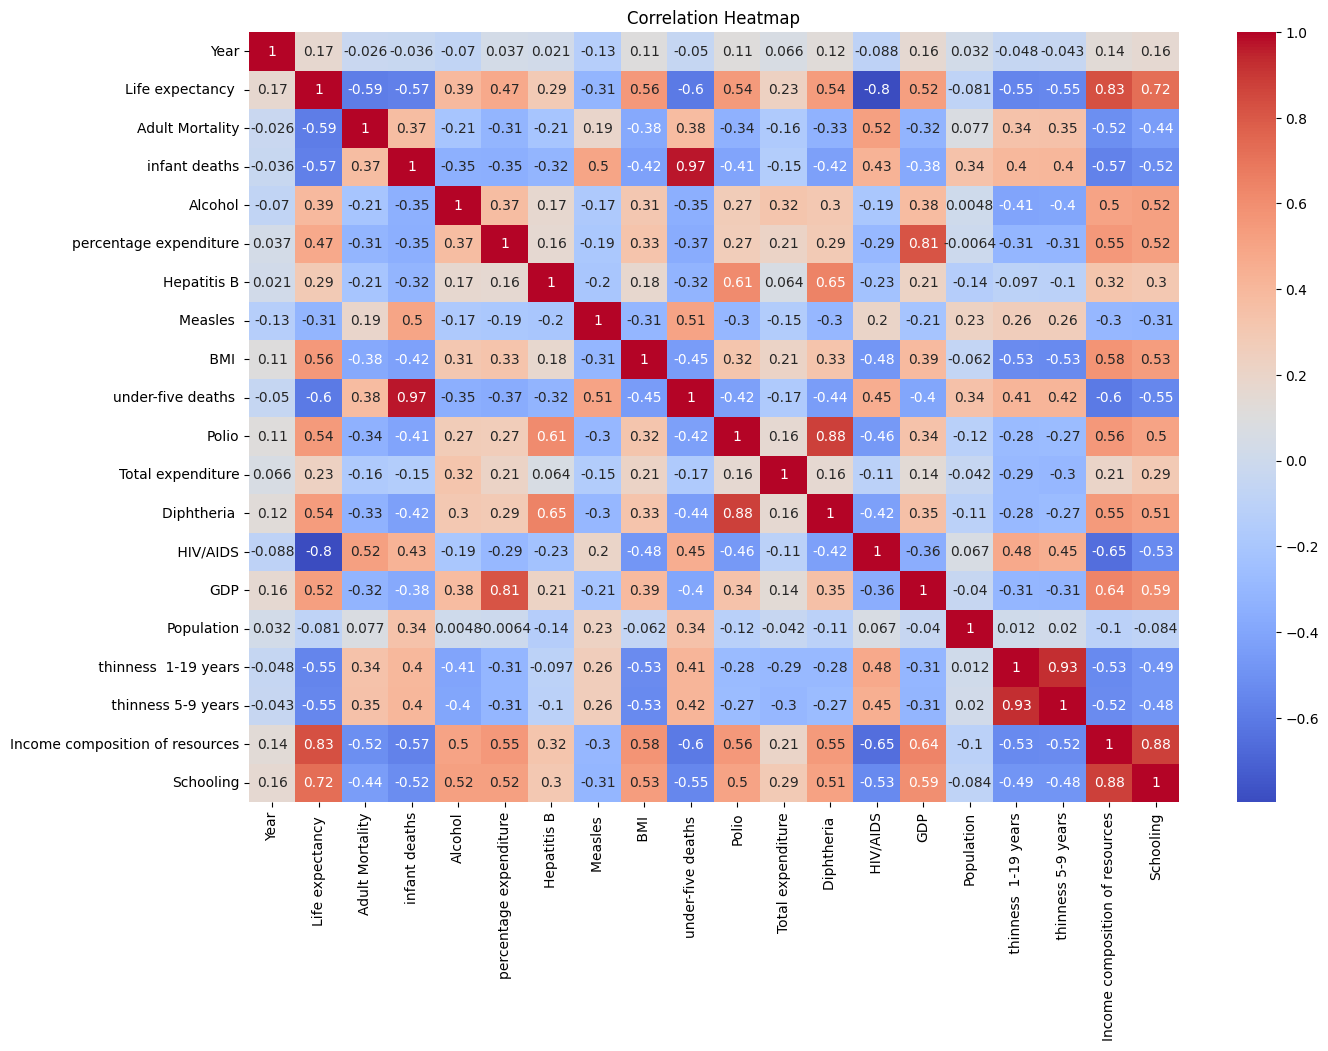

In [35]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation = data[numeric_columns].corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
cols_to_encode = ['Country', 'Status']
label_encoder = LabelEncoder()
for col in cols_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

In [37]:
X=data.drop("Life expectancy ",axis=1)
y=data["Life expectancy "]

In [38]:
cols_to_scale = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model=Sequential([
     Dense(64, activation='relu', input_dim=21),
     Dense(64, activation='relu'),
     Dense(64, activation='relu'),
     Dense(1, activation='linear')         #  on the output always differt output use
])

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,793 (38.25 KB)

 Trainable params: 9,793 (38.25 KB)

 Non-trainable params: 0 (0.00 B)

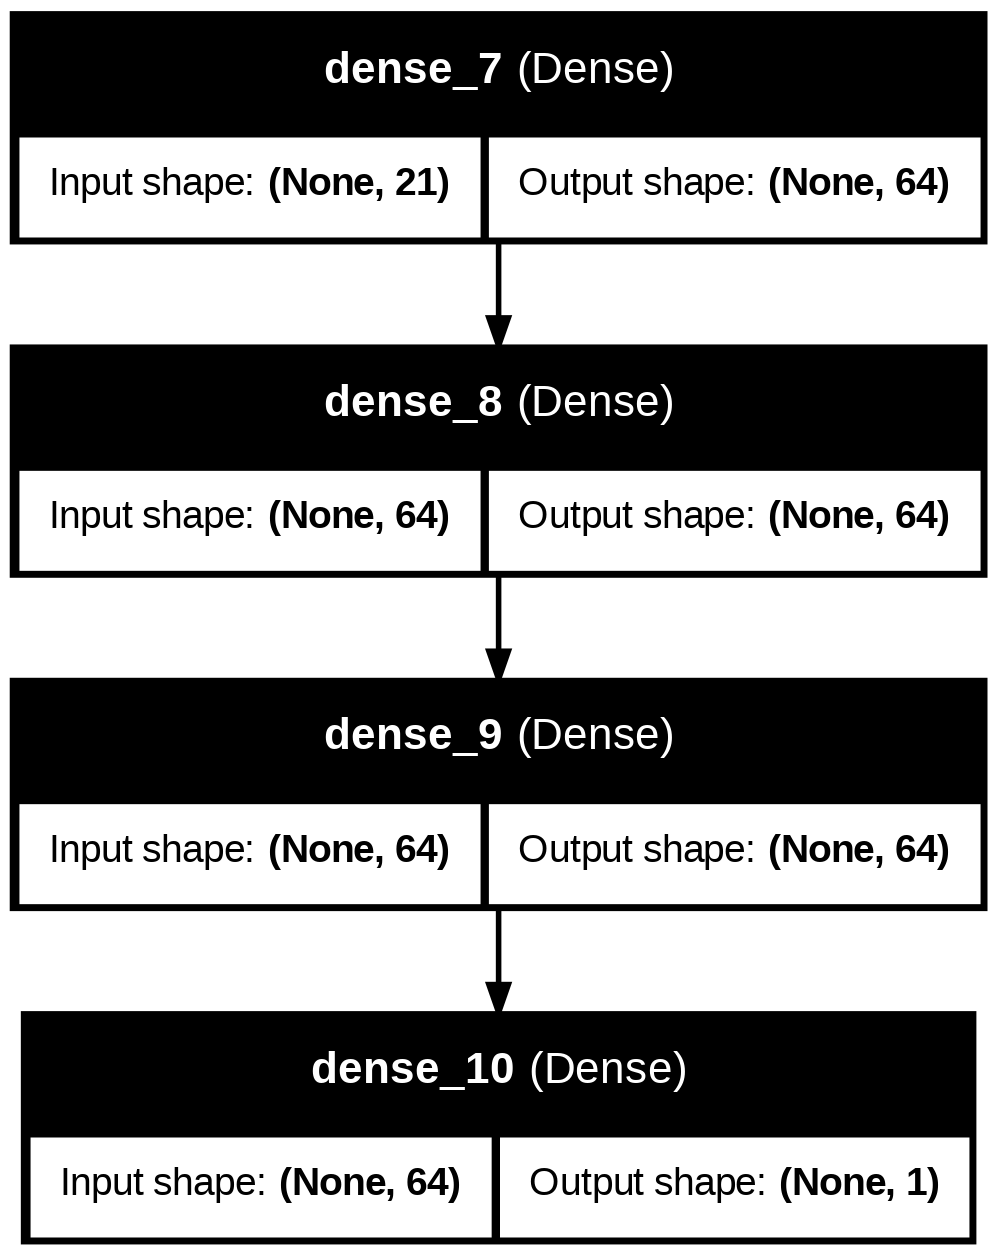

In [46]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [47]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 4351.9893 - mean_absolute_error: 64.9042 - mean_squared_error: 4351.9893 - val_loss: 277.6291 - val_mean_absolute_error: 14.6251 - val_mean_squared_error: 277.6291
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 210.6676 - mean_absolute_error: 11.4057 - mean_squared_error: 210.6676 - val_loss: 95.7269 - val_mean_absolute_error: 7.8221 - val_mean_squared_error: 95.7269
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.8280 - mean_absolute_error: 7.2597 - mean_squared_error: 83.8280 - val_loss: 73.0033 - val_mean_absolute_error: 6.8309 - val_mean_squared_error: 73.0033
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.9446 - mean_absolute_error: 6.6463 - mean_squared_error: 69.9446 - val_loss: 62.1880 - val_mean_absolute_error: 6.3268 - val_mean_squared_error: 62.1880
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.0064 - mean_absolute_error: 6.3826 - mean_squared_error: 63.0064 -

In [48]:
y_pred=model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [49]:
Accuracy=r2_score(y_test,y_pred)
Accuracy

0.8620913584708325